In [1]:
# Required for estimating the Hessian which is necessary estimate the step-size
def Hess_Comp(y,x_list):
    grads=[];H=[];grads1=[];H1=[];
    grads.append(tf.gradients(y, x_list))
    for i in range(0,len(grads[0])):
        if grads[0][i] == None:
            grads1.append(cons(10))   
        else: 
            grads1.append(grads[0][i])
    H.append([tf.gradients(y_, x_list) for y_ in grads1])
    for i in range(0,len(H[0])):
        for j in range(0,len(H[0][i])):
            if H[0][i][j] == None:
                H1.append(cons(10))   
            else: 
                H1.append(H[0][i][j])
    H1 = tf.reshape(H1,[len(x_list),len(x_list)])
    grads1 = tf.reshape(grads1,[len(x_list),1])

    return(H1,grads1)

In [2]:
# This function is called in 'Hess_Comp' function to initisalise those elements in the Hessian matrix where the 
# double differential is zero.
def cons(x):
    return tf.constant(x, dtype=tf.float32)

In [6]:
import tensorflow as tf
import numpy as np

data_x = [0.,1.,2.,3.]
data_y = [2.,3.,4.,5.]
batch_size = len(data_x)

# Input and Output. No batch_size for simplicity.
x = tf.placeholder(shape=[batch_size], dtype=tf.float32, name="x")
y = tf.placeholder(shape=[batch_size], dtype=tf.float32, name="y")

# Weight and bias.
# The wieghts have been generalised 

wrt_variables = tf.Variable(tf.ones(shape=[2,1]), dtype=tf.float32, name="wrt")
z = tf.Variable(tf.ones(shape=[2,1]), dtype=tf.float32, name="z")
c = tf.constant

# Making a prediction and comparing it to the true output
wrt_variables_list = tf.unstack(wrt_variables);
pred = x * wrt_variables_list[0] + wrt_variables_list[1]
loss = (tf.reduce_mean(0.5 * (y - pred)**2))
[Hess,grad]=Hess_Comp(loss,wrt_variables_list);

# USing Conjugate Gradient method to estimate the step-size without inverting the Hessian. 
cg_wrt_variables = z;

for iteration in range(5):
    cg_wrt_variables_list = tf.unstack(cg_wrt_variables)
    cg_loss = (grad - tf.matmul(Hess,cg_wrt_variables_list))**2
    [H,G] = Hess_Comp(cg_loss,cg_wrt_variables_list);
    d=-G;
    for index in range (0,len(cg_wrt_variables_list)-1):
        Alpha_N= tf.matmul(-tf.transpose(G),d);
        Alpha_D= tf.matmul(tf.matmul(tf.transpose(d),H),d);
        Alpha = tf.divide(Alpha_N,Alpha_D);
        cg_update_directions = Alpha*d    
        cg_wrt_variables = tf.assign_add(cg_wrt_variables,cg_update_directions)
        cg_wrt_variables_list = tf.unstack(cg_wrt_variables);
        cg_loss = (grad - tf.matmul(Hess,cg_wrt_variables_list))**2
        [H1,G]=Hess_Comp(cg_loss,cg_wrt_variables_list)
        Beta_N= tf.matmul(tf.matmul(tf.transpose(G),H),d);
        Beta_D= tf.matmul(tf.matmul(tf.transpose(d),H),d);
        Beta = tf.divide(Beta_N,Beta_D);
        Beta_update_directions = tf.unstack(Beta*d)
        d=tf.subtract(Beta_update_directions,G)
        [H,G]=Hess_Comp(cg_loss,cg_wrt_variables_list)
        
update_directions = -cg_wrt_variables;
update_directions=(tf.unstack(update_directions))
wrt_variables = tf.assign_add(wrt_variables,update_directions)


In [9]:
sess = tf.Session()
print("Hi")

sess.run(tf.global_variables_initializer())

comp_loss = sess.run(
    loss,
    feed_dict={
        x: data_x,
        y: data_y
    }
)
print("Initial loss:", initial_loss)    
loss_iter=np.zeros(21);
loss_iter[0]=comp_loss;

for iteration in range(20):
    comp_loss, g1,g,cg_wrt = sess.run(
        [loss,wrt_variables,grad,cg_loss],
        feed_dict={
            x: data_x,
            y: data_y
        }
    )
    
    print("Loss after iteration {}: {}".format(iteration, comp_loss))
    loss_iter[iteration+1]=comp_loss;

Predicted = data_x *g1[0] +g1[1];
    
# Results:
print("Prediction:", Predicted)

print("Expected:", data_y)
sess.close();

Hi
Initial loss: 0.5
Loss after iteration 0: 0.5
Loss after iteration 1: 9.698908343125368e-12
Loss after iteration 2: 2.872238979989561e-08
Loss after iteration 3: 1.7763568394002505e-15
Loss after iteration 4: 1.7763568394002505e-15
Loss after iteration 5: 0.0
Loss after iteration 6: 0.0
Loss after iteration 7: 0.0
Loss after iteration 8: 0.0
Loss after iteration 9: 0.0
Loss after iteration 10: 0.0
Loss after iteration 11: 0.0
Loss after iteration 12: 0.0
Loss after iteration 13: 0.0
Loss after iteration 14: 0.0
Loss after iteration 15: 0.0
Loss after iteration 16: 0.0
Loss after iteration 17: 0.0
Loss after iteration 18: 0.0
Loss after iteration 19: 0.0
Prediction: [ 2.          2.99999994  3.99999988  4.99999982]
Expected: [2.0, 3.0, 4.0, 5.0]


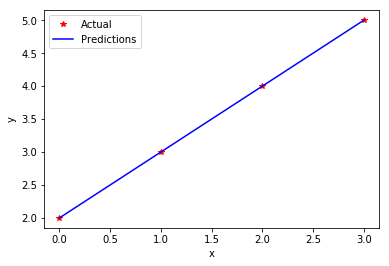

In [12]:
import matplotlib.pyplot as plt
Actual, = plt.plot(data_x,data_y,'r*')
Predictions, = plt.plot(data_x,Predicted,'b')
plt.legend([Actual, Predictions], ['Actual', 'Predictions'])
plt.ylabel('y')
plt.xlabel('x')
plt.show()

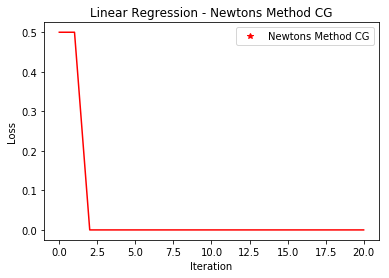

In [14]:
Loss, = plt.plot(loss_iter,'r-')
plt.legend([Actual, Predictions], ['Newtons Method CG'])
plt.ylabel('Loss')
plt.title('Linear Regression - Newtons Method CG')
plt.xlabel('Iteration')
plt.show()